In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import warnings
warnings.filterwarnings("ignore")

In [3]:
path ="C:/Users/Benedetta/Desktop/Criticality in barrel cortex/Thalamus/2024 work/Codes/Marianietal2026-PlosCompBio"

In [19]:
sys.path.append(path)
from avalanches_functions import *
from functions import * 
from plotting_functions import *
import matplotlib
matplotlib.rc('font', **{'family':'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

In [5]:
cd "C:/Users/Benedetta/Downloads/Barrel+Talamo/Barrel+Talamo"

C:\Users\Benedetta\Downloads\Barrel+Talamo\Barrel+Talamo


In [6]:
pwd

'C:\\Users\\Benedetta\\Downloads\\Barrel+Talamo\\Barrel+Talamo'

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [8]:
import os
import numpy as np
import scipy.signal as ss
import mat73

thalamus = True
start = 3
if not thalamus:
    rat = 4
    
    file = os.listdir()[1:][rat]
    data_dict = mat73.loadmat(file)
    data = data_dict['amplifier_data']
    stim = data_dict['adc_data']
    indexes = (np.where(stim> 1.5)[0])[np.where(np.diff(np.where(stim> 1.5)[0])>1)]
    
    indexes = np.array(indexes.tolist() + [int(indexes[-1] + np.diff(indexes)[-1])]) - 125
    fs = 25000
    

if thalamus:
    rat = 1
    file = os.listdir()[start:][rat]
    data_dict = mat73.loadmat(file)
    data = data_dict['amplifier_data']
    stim = data_dict['adc_data'][0]
    indexes = (np.where(stim> 1.5)[0])[np.where(np.diff(np.where(stim> 1.5)[0])>1)]
    indexes = np.array(indexes.tolist() + [int(indexes[-1] + np.diff(indexes)[-1])]) - 125
    fs = 25000


In [9]:
import os
import numpy as np
import scipy.signal as ss
import scipy.signal as ss
fs = 25000
nTrials = 28
nchan = 30
nchan_c = 27
import scipy.signal as ss
##spikes

fs = 25000
nyq = 0.5*fs
T =10

low = 300/nyq
high = 3000/nyq
b,a = ss.butter(2,[low,high], "bandpass")
spikes = ss.filtfilt(b,a,data,axis = 1, padlen=150)
spikes = (spikes - np.mean(spikes,0)) # substracting mean population trend (artifact removal)

spikesTrials = []
if not thalamus:
    for r in range(nTrials):
        spikesTrials.append(spikes[:nchan_c,indexes[r]:indexes[r]+ int(fs*T)])
    spikesTrials = np.array(spikesTrials)
else:
    spikes = (spikes[:nchan])
    for r in range(nTrials):
        spikesTrials.append(spikes[:,indexes[r]:indexes[r]+int(fs*T)])
    spikesTrials = np.array(spikesTrials)


In [10]:
nch = spikesTrials.shape[1]
num = spikesTrials.shape[0]
binspikes =  np.zeros((num,nch,spikesTrials.shape[2]), dtype = int)
soglia = 3
for r in range(num):
    for ch in range(nch):
        binspikes[r,ch,:] = findpeaks(spikesTrials[r,ch,:],Thres(soglia,spikesTrials[r,ch,:]),"neg", dist = 10)


## Avalanches distributions

In [11]:
cd "../../../Desktop/Criticality in barrel cortex"

C:\Users\Benedetta\Desktop\Criticality in barrel cortex


In [12]:
import powerlaw as pwl
import matplotlib.pyplot as plt
import numpy as np
from powerlaw_fit import *
from stats import *
from power import *
from matplotlib import cm


## Spontaneous activity

In [ ]:
nch = spikesTrials.shape[1]
num = spikesTrials.shape[0]
binspikes =  np.zeros((num,nch,spikesTrials.shape[2]), dtype = int)
soglia = 4
for r in range(num):
    for ch in range(nch):
        binspikes[r,ch,:] = findpeaks(spikesTrials[r,ch,:],Thres(soglia,spikesTrials[r,ch,:]),"neg", dist = 10)



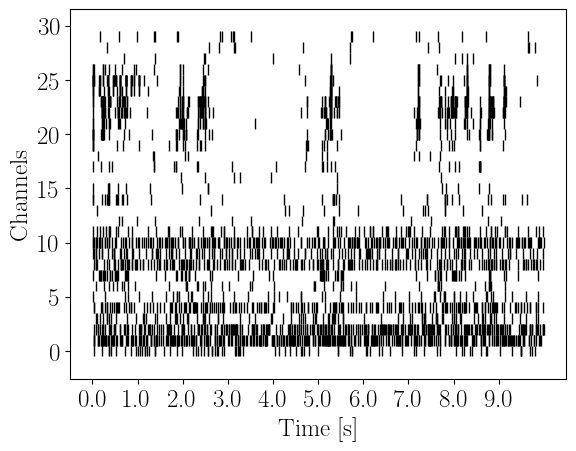

In [31]:

pos = []
trial = 24
for g in range(binspikes[trial].shape[0]):
    pos.append(np.where(binspikes[trial,g]>0)[0])

pos = np.asarray(pos)
plt.eventplot(pos, color='black',linewidth=1.);
plt.xlabel('Time [s]')
plt.xticks(np.arange(0,25000*10,25000), labels = np.arange(0,25000*10,25000)/25000)
plt.ylabel('Channels');


In [32]:
nch = spikesTrials.shape[1]
num = spikesTrials.shape[0]
binspikes =  np.zeros((num,nch,spikesTrials.shape[2]), dtype = int)
soglia = 3
for r in range(num):
    for ch in range(nch):
        binspikes[r,ch,:] = findpeaks(spikesTrials[r,ch,:],Thres(soglia,spikesTrials[r,ch,:]),"neg", dist = 10)

In [33]:
restspikes = concatenat_spikes(binspikes[:,20:],2,10,nTrials)
binspikes.shape,restspikes.shape
S_shape_ = np.zeros((restspikes.shape[0]))
for ch in range(restspikes.shape[1]):
    S_shape_ += restspikes[:,ch]

sizes, durations, S_shape, shape_mean, freq = avalanche_finder(S_shape_,1)

In [34]:
from plotting_funtions import *
from avalanches_functions import *

In [35]:
s = [sizes]
d = [durations]
extrinsic_par = []
h = 0

temp = []
sizes = s[h]
durations = d[h]

xm = max(sizes) if h == 0 else max(sizes)



expo = False
centredbin, pdfnorm, x, px_fit, exp, errexp, xmin = LogScript_new(sizes,1,4, xm,'default', expo)
print(xmin)

temp.append([centredbin, pdfnorm, x, px_fit, exp, errexp, xmin])
xm2 = max(durations) if h == 0 else max(durations)

centredbin, pdfnorm, x, px_fit, exp, errexp, xmin = LogScript_new(durations,1,4,xm2,'default', expo)
temp.append([centredbin, pdfnorm, x, px_fit, exp, errexp, xmin])
a, b, c, x, inter, pred, errpred, fit, errfit = scaling_new(sizes,durations,1,4,4,
                                                            'default','default','default',
                                                            'default',xm,xm2,'default','default')
print(xmin)
temp.append([sizes, durations, a, b, c, x, inter, pred, errpred, fit, errfit])
extrinsic_par.append(temp)

Calculating best minimal value for power law fit
NBins for non random data are 20
Alpha is 1.9239640796719615
2.0
Calculating best minimal value for power law fit
NBins for non random data are 14
Alpha is 2.3717782262297966
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.484703581851004 +- 0.03458841227685123
Fit from of average size given duration points: delta =  1.3142987566466007 +- 0.029298048492840317
3.0


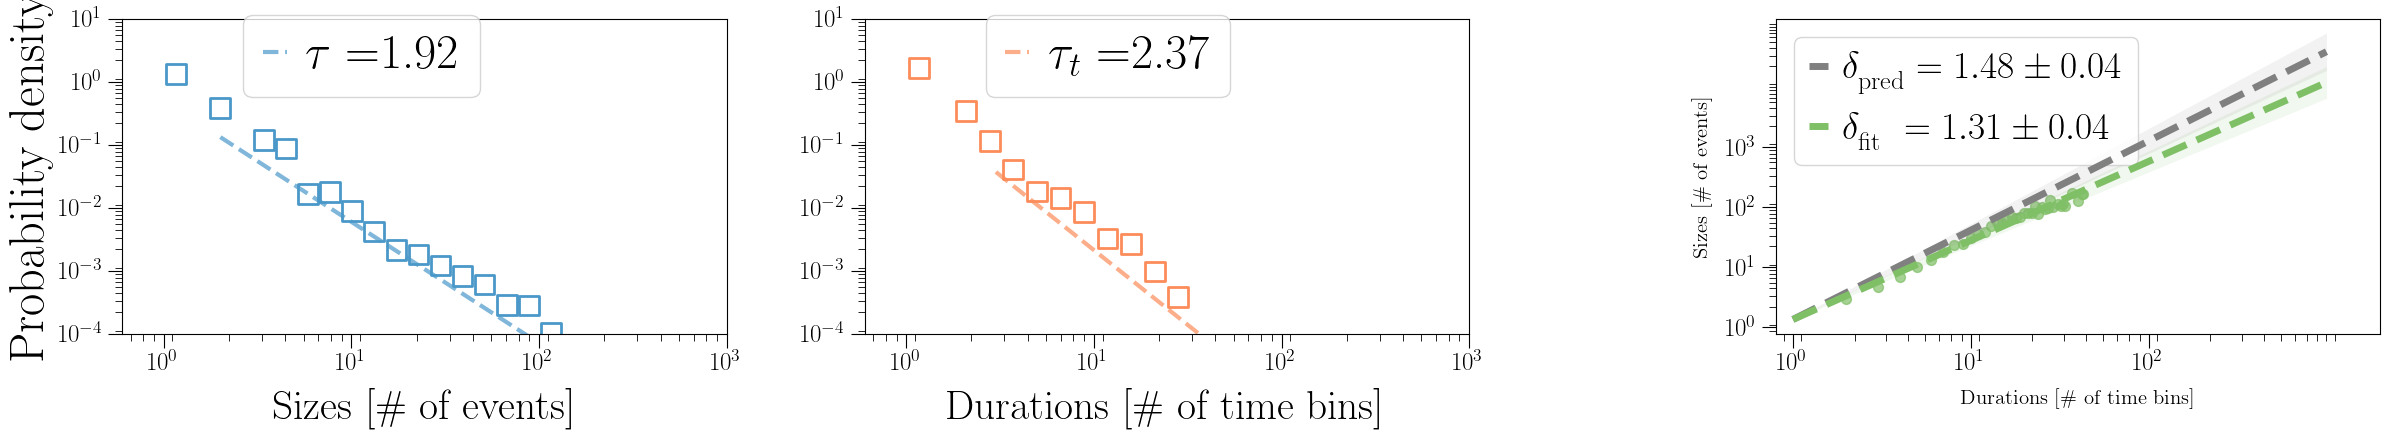

In [36]:

if expo == True:
    prediz = False
    plot_fit = False
else:
    prediz = True
    plot_fit = True
fig,ax = plt.subplots(1,4,figsize = (24,4.5), gridspec_kw={'width_ratios': [1,1,0.05,1]})
color = ['blue', 'red']
#datasizes = [size]
for h in range(1):
    plot_av_statistics(ax[0], extrinsic_par[h][0][:-1], color = cm.get_cmap('Blues')(0.6),
                       xmin = extrinsic_par[h][0][-1], xmax = max(sizes), label = r"$\tau$ ="+f"{round(extrinsic_par[h][0][:-1][-2],2)}",
                       marker = 's', s = 200, lw = 2, lwline = 3, alphaline = 0.7,
                       plot_fit = plot_fit,expo = expo)
   
    
    ax[0].set_xlim(0.6,1000)
    ax[0].set_ylim(0.0001,10)
    ax[0].set_xticks(np.logspace(0,3,4))

    ax[0].set_xlabel(r'Sizes [\# of events]', fontsize = 30, labelpad = 10)
    
    plot_av_statistics(ax[1], extrinsic_par[h][1][:-1], color = cm.get_cmap('OrRd')(0.5),
                   xmin = extrinsic_par[h][1][-1], xmax = max(durations), label = r"$\tau_t$ ="+ f"{round(extrinsic_par[h][1][:-1][-2],2)}",
                   marker = 's', s = 200, lw = 2, lwline = 3, alphaline = 0.7,
                   plot_fit = plot_fit, expo= expo)
    
  
    ax[1].set_xlim(0.6,500)
    ax[1].set_ylim(0.0001,10)
    ax[1].set_xticks(np.logspace(0,3,4))

    ax[1].set_xlabel(r'Durations [\# of time bins]', fontsize = 30, labelpad = 10)
    
    xmax = 1000
    plot_crackling_noise(ax[3], extrinsic_par[h][2], cpoints = 'forestgreen',
                         cpred = 'gray', cfit = cm.get_cmap('summer_r')(0.5),
                         xmin = 1, xmax = xmax, alphamarker = 0.7, s = 50, lwline = 5, prediz= prediz)
  
    ax[3].legend(handletextpad=0.4, handlelength = 0.5, scatteryoffsets = [0.5],
              fontsize = 27, loc = 'upper left')


    ax[3].set_xlim(0.8,2000)
    ax[3].set_xticks([1,10,100])
    ax[3].set_yticks([1,10,100,1000])
if not expo: 
    ax[0].legend(handletextpad=0.4, handlelength = 0.5, scatteryoffsets = [0.5],
                   fontsize = 35, loc = (0.2,0.75))
    ax[1].legend(handletextpad=0.4, handlelength = 0.5, scatteryoffsets = [0.5],
                   fontsize = 35, loc = (0.2,0.75))
ax[2].remove()


ax[0].set_ylabel('Probability density', fontsize = 35)
#ax[0].yaxis.set_label_coords(-0.2,-0.17)



for j in [0,1,3]:
    locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.linspace(0,1,10),numticks=10)
    ax[j].xaxis.set_minor_locator(locmin)
    ax[j].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.linspace(0,1,10),numticks=10)
    ax[j].yaxis.set_minor_locator(locmin)
    ax[j].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax[j].tick_params(length = 5, which = 'minor')
    ax[j].tick_params(length = 10)


fig.tight_layout(pad = .6,h_pad = 2)
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
plt.show()

In [37]:


signal_sub = data[:,::10]


In [38]:
import os
import numpy as np
import scipy.signal as ss
import emd
fs = 25000/10
f0 = 100.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
nyq = 0.5*fs
low = 1/nyq
high = 50/nyq 



b,a = ss.butter(2,[low,high], "bandpass")
# Design notch filter
b2, a2 = ss.iirnotch(f0, Q, fs)
#print(sig2.shape)
sig3 = ss.filtfilt(b,a,signal_sub[:,:],axis = 1)
sig3 = ss.filtfilt(b2,a2,sig3[:,:],axis = 1, padlen=150)
#print(sig3.shape)
k = 0
indexes_ = np.asarray(indexes/10, dtype=int)

if thalamus:
    sig3 = (sig3[:nchan])
    lfpTrials = []
    for r in range(0,len(indexes_)-1):
        if indexes_[r+1] - int(fs)*2< len(sig3[0]):
            lfpTrials.append(sig3[:,indexes_[r]:indexes_[r] + int(fs)*10])
            k+= 1

    
if not thalamus:
    sig3 = sig3[:nch]
    lfpTrials = []
    for r in range(0,len(indexes_)-1):
        if indexes_[r+1] - int(fs)*2< len(sig3[0]):
            lfpTrials.append(sig3[:,indexes_[r]:indexes_[r] + int(fs)*10])
            k+= 1

lfpTrials = np.array(lfpTrials)


## PAC with firing rate

In [48]:
prova_n = restspikes
#inspikes[0].T
N = prova_n.shape[0]
for ch in range(prova_n.shape[1]):
    S_shape_ += prova_n[:,ch]
where_spikes = np.where(S_shape_ != 0)
interspike_time = (where_spikes - np.roll(where_spikes,1))
interspike_time = np.delete(interspike_time,0) # remove the first element
mean_interspike_time = np.sum(interspike_time)/len(interspike_time)
mean_interspike_time = int(round(mean_interspike_time))
mean_interspike_time

103

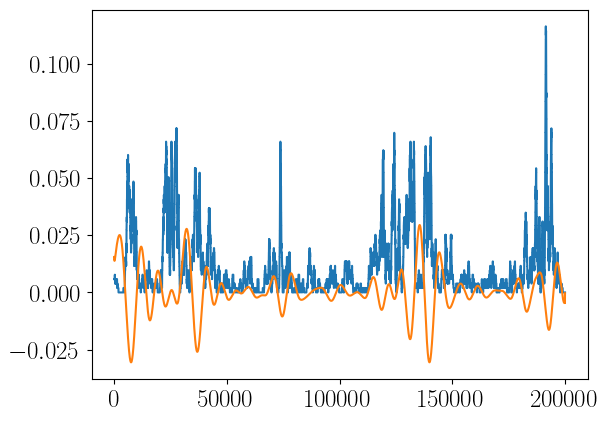

In [44]:
## Compute density

## CORTEX

aas =[]
aas2 =[]
from numpy import *
ref_ch = 25
cortex = 20

factor = 10
fs = 25000/factor
for s in range(binspikes.shape[0]):
    v = emd.sift.mask_sift(lfpTrials[s,ref_ch,int(fs)*2:], mask_freqs= 30./fs, max_imfs=5, )
    from scipy.signal import resample_poly
    upsampled = resample_poly(v, up=factor, down=1)
    low = 3
    IP, IF, IA = emd.spectra.frequency_transform(upsampled, fs*100, 'nht')
    phi = IP[:,low][:]
    coef = 5
    amp = compute_density(binspikes[s,cortex:,int(fs*factor)*2:].T, mean_interspike_time,coef)
    p_bins = arange(0, 2*pi, 0.1)
    a_mean = zeros(size(p_bins)-1)
    p_mean = zeros(size(p_bins)-1)
    for k in range(size(p_bins)-1):     #For each phase bin,
        pL = p_bins[k]                  #... lower phase limit,
        pR = p_bins[k+1]                #... upper phase limit.
        indices=(phi>=pL) & (phi<pR)    #Find phases falling in bin,
        a_mean[k] = mean(amp[indices])  #... compute mean amplitude,
        p_mean[k] = mean([pL, pR])      #... save center phase.
    aas.append(a_mean)


plt.plot(amp)
plt.plot(IA[:,low]*10**-4);


In [49]:
aasmean = np.mean(np.asarray(aas),0)
aas = np.asarray(aas)
aas2 = aas

In [46]:
lfpTrials.shape, binspikes.shape

((29, 30, 25000), (28, 30, 250000))

In [47]:
import powerlaw as pwl
import numpy as np
from powerlaw_fit import *
from stats import *
from power import *
from matplotlib import cm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd
#from numba import njit
from statsmodels.regression import linear_model as sm

matplotlib.rc('font', **{'family':'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

In [50]:
plt.rcParams['font.size'] = 23

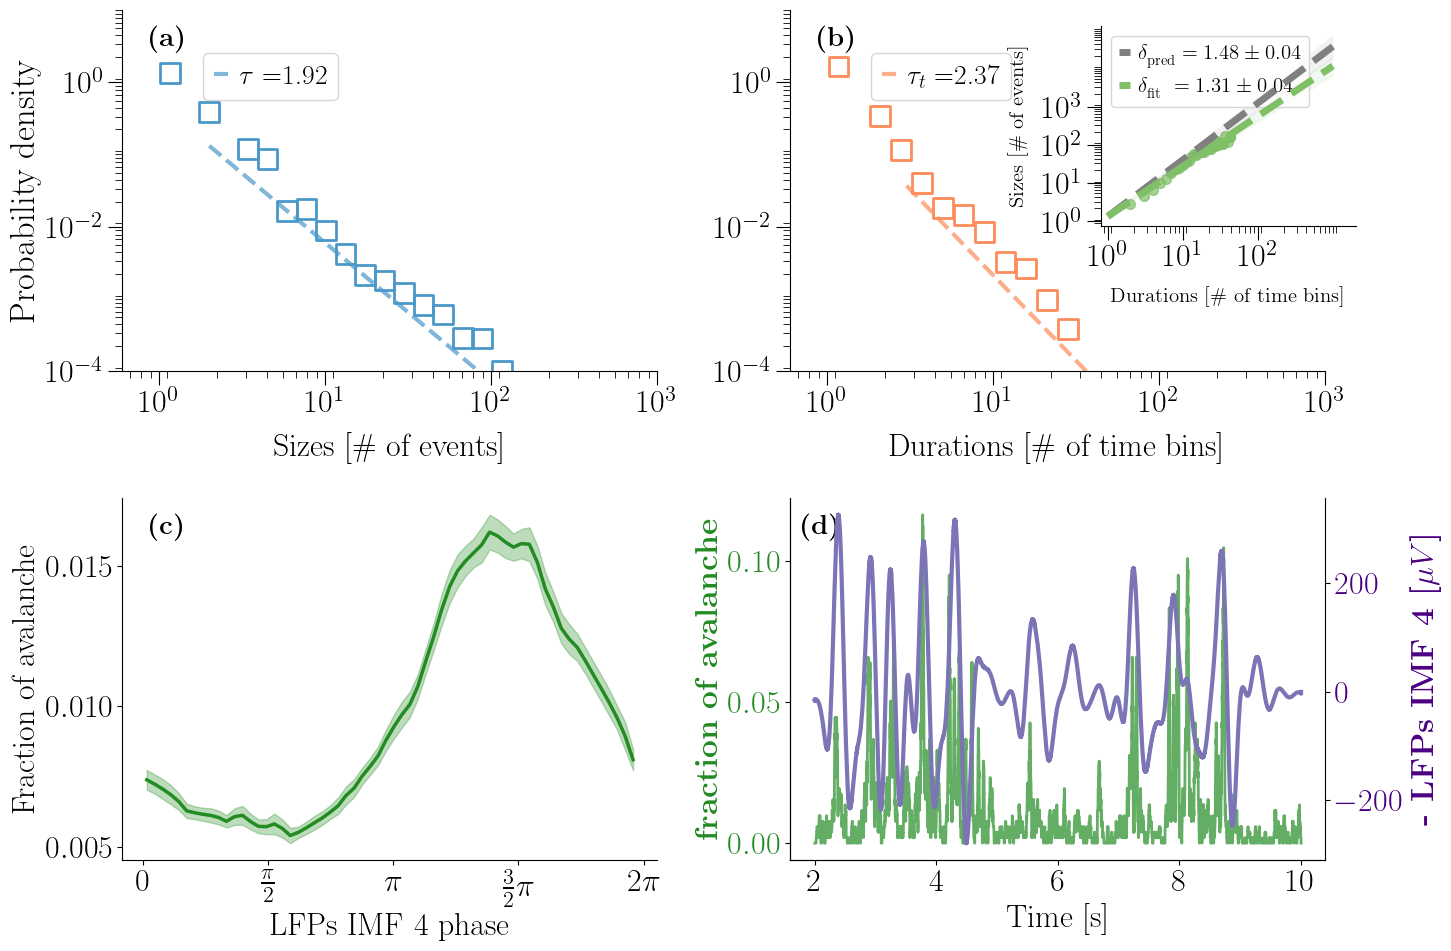

In [51]:
# import emd
sample_rate = 25000


plt.rcParams['axes.spines.top']= False
plt.rcParams['axes.spines.right']= False

if expo == True:
    prediz = False
    plot_fit = False
else:
    prediz = True
    plot_fit = True
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(2,2,figsize =(15,10))
left, bottom, width, height  = [0.75, 0.75, 0.17, 0.2]

ax3 = fig.add_axes([left, bottom, width, height])


color = ['blue', 'red']
#datasizes = [size]
for h in range(1):
    plot_av_statistics(ax[0,0], extrinsic_par[h][0][:-1], color = cm.get_cmap('Blues')(0.6),
                       xmin = extrinsic_par[h][0][-1], xmax = max(sizes), label = r"$\tau$ ="+f"{round(extrinsic_par[h][0][:-1][-2],2)}",
                       marker = 's', s = 200, lw = 2, lwline = 3, alphaline = 0.7,
                       plot_fit = plot_fit,expo = expo)
   
    
    ax[0,0].set_xlim(0.6,1000)
    ax[0,0].set_ylim(0.0001,10)
    ax[0,0].set_xticks(np.logspace(0,3,4))

    ax[0,0].set_xlabel(r'Sizes [\# of events]', fontsize = 23, labelpad = 10)
    
    plot_av_statistics(ax[0,1], extrinsic_par[h][1][:-1], color = cm.get_cmap('OrRd')(0.5),
                   xmin = extrinsic_par[h][1][-1], xmax = max(durations), label = r"$\tau_t$ ="+ f"{round(extrinsic_par[h][1][:-1][-2],2)}",
                   marker = 's', s = 200, lw = 2, lwline = 3, alphaline = 0.7,
                   plot_fit = plot_fit, expo= expo)
    
  
    ax[0,1].set_xlim(0.6,500)
    ax[0,1].set_ylim(0.0001,10)
    ax[0,1].set_xticks(np.logspace(0,3,4))

    ax[0,1].set_xlabel(r'Durations [\# of time bins]', fontsize = 23, labelpad = 10)
    
    xmax = 1000

    
    plot_crackling_noise(ax3, extrinsic_par[h][2], cpoints = 'forestgreen',
                         cpred = 'gray', cfit = cm.get_cmap('summer_r')(0.5),
                         xmin = 1, xmax = xmax, alphamarker = 0.7, s = 50, lwline = 5, prediz= prediz)
  
    ax3.legend(handletextpad=0.4, handlelength = 0.5, scatteryoffsets = [0.5],
              fontsize = 15, loc = 'upper left')


    ax3.set_xlim(0.8,2000)
    ax3.set_xticks([1,10,100])
    ax3.set_yticks([1,10,100,1000])
    
if not expo: 
    ax[0,0].legend(handletextpad=0.4, handlelength = 0.5, scatteryoffsets = [0.5],
                   fontsize = 20, loc = (0.15,0.75))
    ax[0,1].legend(handletextpad=0.4, handlelength = 0.5, scatteryoffsets = [0.5],
                   fontsize = 20, loc = (0.15,0.75))
#ax[2].remove()


ax[0,0].set_ylabel('Probability density', fontsize = 25)
#ax[0].yaxis.set_label_coords(-0.2,-0.17)



for ax_ in [ax[0,0],ax[0,1],ax3]:
    locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.linspace(0,1,10),numticks=10)
    ax_.xaxis.set_minor_locator(locmin)
    ax_.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.linspace(0,1,10),numticks=10)
    ax_.yaxis.set_minor_locator(locmin)
    ax_.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax_.tick_params(length = 5, which = 'minor')
    ax_.tick_params(length = 10)




#from scipy import ndimage
mean_interspike_time = 103
coef = 5

#ax[1,1].plot(p_mean, aas2mean, color='r')
#ax[1,1].fill_between(p_mean,aas2mean - np.std(aas2)/np.sqrt(len(aas2)),aas2mean+ np.std(aas2)/np.sqrt(len(aas2)),color='r', alpha =.3)
ax[1,0].fill_between(p_mean,aasmean - np.std(aas2,0)/np.sqrt(len(aas2)),aasmean+ np.std(aas2,0)/np.sqrt(len(aas)),color='forestgreen', alpha =.3)
ax[1,0].plot(p_mean, aasmean, color ='forestgreen', lw = 2.5)
ax[1,0].set_xlabel('LFPs IMF 4 phase')
ax[1,0].set_ylabel('Fraction of avalanche');


plt.rcParams['axes.spines.right']= True


t = np.arange(0,25000*8,1)/25000 + 2
trial_ = 5
v = emd.sift.mask_sift(lfpTrials[trial_,25,int(sample_rate/factor)*2:], mask_freqs= 30./fs, max_imfs=5, )
from scipy.signal import resample_poly
upsampled = resample_poly(v, up=factor, down=1)
amp = compute_density(binspikes[trial_,20:,sample_rate*2:].T, mean_interspike_time,coef ## attenzione
                    )
ax[1,1].plot(t,amp, color = 'forestgreen', lw = 2,alpha = .7)

ax[1,1].set_ylabel(r'\textbf{fraction of avalanche} ', color='forestgreen',)  # we already handled the x-label with ax1

ax[1,1].set_xlabel('Time [s]')
ax[1,1].tick_params(axis='y', labelcolor='forestgreen',)

ax2 = ax[1,1].twinx() # instantiate a second Axes that shares the same x-axis

color = 'indigo'
#ax2.set_ylabel('Low frequency oscillation ', color=color)  # we already handled the x-label with ax1#

#ax2.tick_params(axis='y', labelcolor=color)
_,_,IA_low=  emd.spectra.frequency_transform(-(upsampled[:,3] + upsampled[:,4]), sample_rate, 'nht')
ax2.tick_params(axis='y', labelcolor=color)

#ax2.plot(t, IA_low, color = 'indigo', lw = 2, alpha = 1)
ax2.plot(t, -(upsampled[:,3] + upsampled[:,4]), color = cm.get_cmap('Purples')(0.65), lw = 3,alpha = 1)
ax2.set_ylabel(r'\textbf{- LFPs IMF 4 [$\mu V$]}', color =color)



ax[1,0].set_xticks([0,np.pi/2,np.pi,3/2*np.pi, 2*np.pi])
ax[1,0].set_xticklabels(["0",r"$\frac{\pi}{2}$",r"$\pi$",r"$\frac{3}{2}\pi$", r"$2\pi$"])


ax[1,0].annotate('\\textbf{(c)}', size = 20,
                 xy=(1, 1), xycoords='axes fraction',
                 xytext=(0.05, 0.9), textcoords='axes fraction')
ax[1,1].annotate('\\textbf{(d)}', size = 20,
                 xy=(1, 1), xycoords='axes fraction',
                 xytext=(0.02,0.9), textcoords='axes fraction')



ax[0,0].annotate('\\textbf{(a)}', size = 20,
                 xy=(1, 1), xycoords='axes fraction',
                 xytext=(0.05, 0.9), textcoords='axes fraction')
ax[0,1].annotate('\\textbf{(b)}', size = 20,
                 xy=(1, 1), xycoords='axes fraction',
                 xytext=(0.05,0.9), textcoords='axes fraction')

plt.tight_layout()


### Evoked activity

In [52]:
binspikes.shape

(28, 30, 250000)

In [53]:
restspikes = concatenat_spikes(binspikes[:,20:],0,2,28)
binspikes.shape,restspikes.shape
S_shape_ = np.zeros((restspikes.shape[0]))
for ch in range(restspikes.shape[1]):
    S_shape_ += restspikes[:,ch]

sizes, durations, S_shape, shape_mean, freq = avalanche_finder(S_shape_,1)
len(sizes)

4103

In [54]:
s = [sizes]
d = [durations]

In [55]:
extrinsic_par = []
h = 0

temp = []
sizes = s[h]
durations = d[h]

xm = max(sizes) if h == 0 else max(sizes)


#fit = pwl.Fit(sizes,xmin = (1,xm + 1),xmax = max(sizes),parameter_range={"alpha":[1,4]}, discrete = True)
#exp = fit.power_law.alpha
#errexp = fit.power_law.sigma
#xmin = fit.power_law.xmin



expo = False
centredbin, pdfnorm, x, px_fit, exp, errexp, xmin = LogScript_new(sizes,1,4, xm,'default', expo)
print(xmin)

temp.append([centredbin, pdfnorm, x, px_fit, exp, errexp, xmin])
xm2 = max(durations) if h == 0 else max(durations)

centredbin, pdfnorm, x, px_fit, exp, errexp, xmin = LogScript_new(durations,1,4,xm2,'default', expo)
temp.append([centredbin, pdfnorm, x, px_fit, exp, errexp, xmin])
a, b, c, x, inter, pred, errpred, fit, errfit = scaling_new(sizes,durations,1,4,4,
                                                            'default','default','default',
                                                            'default',xm,xm2,'default','default')
print(xmin)
temp.append([sizes, durations, a, b, c, x, inter, pred, errpred, fit, errfit])
extrinsic_par.append(temp)

Calculating best minimal value for power law fit
NBins for non random data are 19
Alpha is 1.7928061341819486
2.0
Calculating best minimal value for power law fit
NBins for non random data are 13
Alpha is 2.0789270457554863
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.360956362994815 +- 0.04220404492990175
Fit from of average size given duration points: delta =  1.2873891393689387 +- 0.025278725354807935
2.0


In [56]:
expo

False

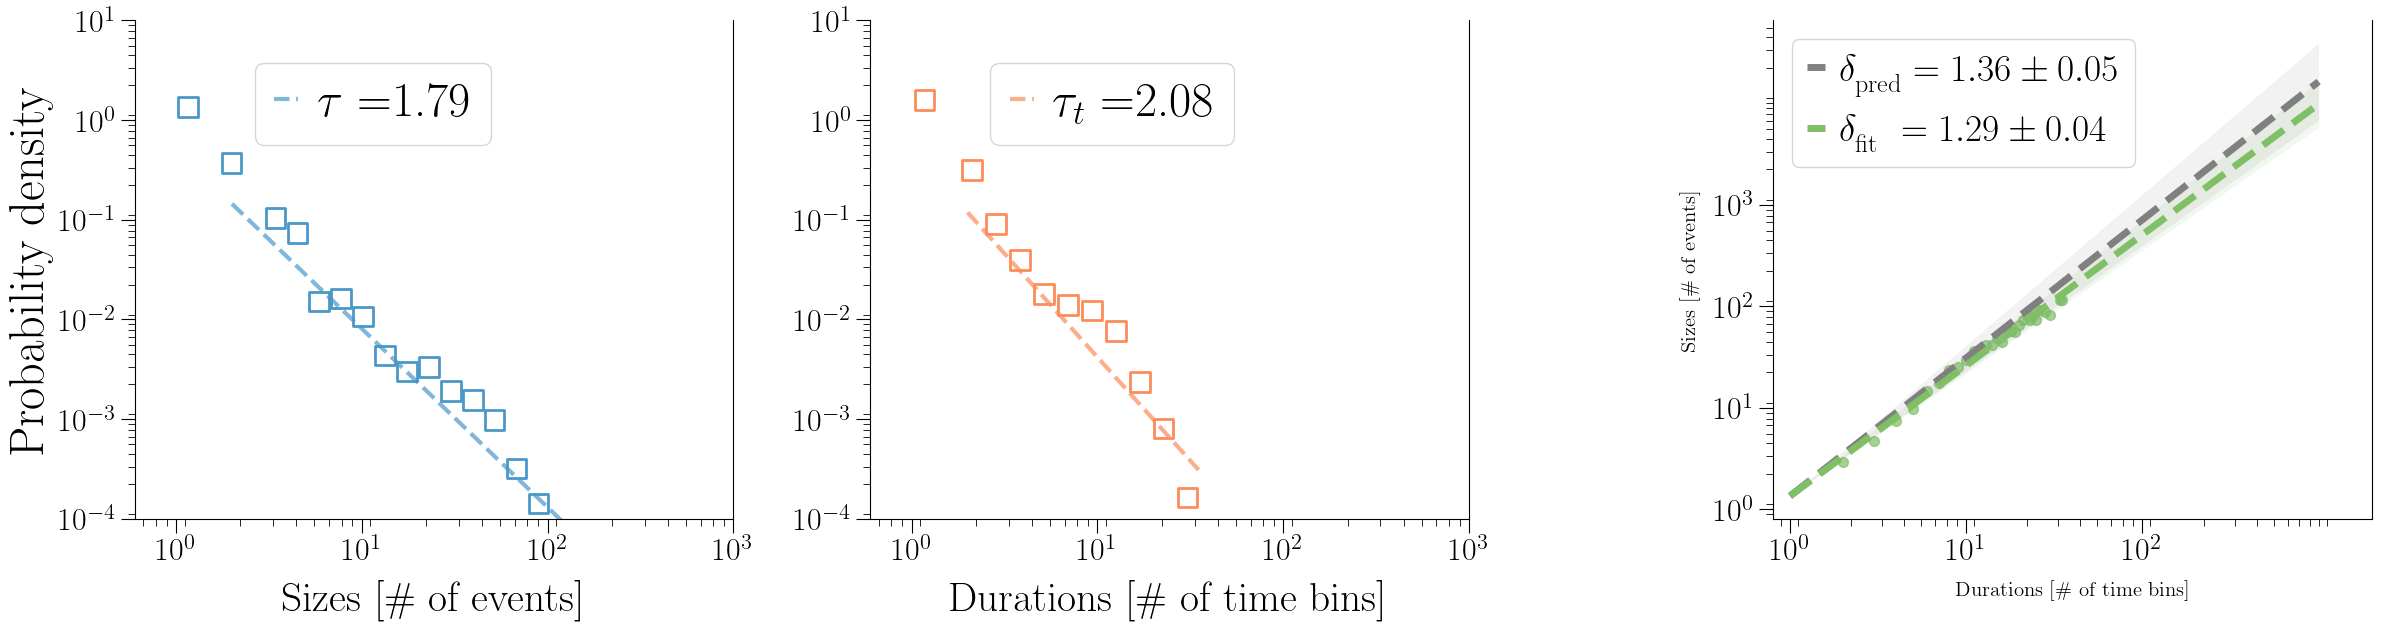

In [57]:
import matplotlib
#expo = True
if expo == True:
    prediz = False
    plot_fit = False
else:
    prediz = True
    plot_fit = True
fig,ax = plt.subplots(1,4,figsize = (24,6.5), gridspec_kw={'width_ratios': [1,1,0.05,1]})
color = ['blue', 'red']
#datasizes = [size]
for h in range(1):
    plot_av_statistics(ax[0], extrinsic_par[h][0][:-1], color = cm.get_cmap('Blues')(0.6),
                       xmin = extrinsic_par[h][0][-1], xmax = max(sizes), label = r"$\tau$ ="+f"{round(extrinsic_par[h][0][:-1][-2],2)}",
                       marker = 's', s = 200, lw = 2, lwline = 3, alphaline = 0.7,
                       plot_fit = plot_fit,expo = expo)
   
    
    ax[0].set_xlim(0.6,1000)
    ax[0].set_ylim(0.0001,10)
    ax[0].set_xticks(np.logspace(0,3,4))

    ax[0].set_xlabel(r'Sizes [\# of events]', fontsize = 30, labelpad = 10)
    
    plot_av_statistics(ax[1], extrinsic_par[h][1][:-1], color = cm.get_cmap('OrRd')(0.5),
                   xmin = extrinsic_par[h][1][-1], xmax = max(durations), label = r"$\tau_t$ ="+ f"{round(extrinsic_par[h][1][:-1][-2],2)}",
                   marker = 's', s = 200, lw = 2, lwline = 3, alphaline = 0.7,
                   plot_fit = plot_fit, expo= expo)
    
  
    ax[1].set_xlim(0.6,500)
    ax[1].set_ylim(0.0001,10)
    ax[1].set_xticks(np.logspace(0,3,4))

    ax[1].set_xlabel(r'Durations [\# of time bins]', fontsize = 30, labelpad = 10)
    
    xmax = 1000
    plot_crackling_noise(ax[3], extrinsic_par[h][2], cpoints = 'forestgreen',
                         cpred = 'gray', cfit = cm.get_cmap('summer_r')(0.5),
                         xmin = 1, xmax = xmax, alphamarker = 0.7, s = 50, lwline = 5, prediz= prediz)
  
    ax[3].legend(handletextpad=0.4, handlelength = 0.5, scatteryoffsets = [0.5],
              fontsize = 27, loc = 'upper left')


    ax[3].set_xlim(0.8,2000)
    ax[3].set_xticks([1,10,100])
    ax[3].set_yticks([1,10,100,1000])
if not expo: 
    ax[0].legend(handletextpad=0.4, handlelength = 0.5, scatteryoffsets = [0.5],
                   fontsize = 35, loc = (0.2,0.75))
    ax[1].legend(handletextpad=0.4, handlelength = 0.5, scatteryoffsets = [0.5],
                   fontsize = 35, loc = (0.2,0.75))
ax[2].remove()


ax[0].set_ylabel('Probability density', fontsize = 35)
#ax[0].yaxis.set_label_coords(-0.2,-0.17)



for j in [0,1,3]:
    locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.linspace(0,1,10),numticks=10)
    ax[j].xaxis.set_minor_locator(locmin)
    ax[j].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.linspace(0,1,10),numticks=10)
    ax[j].yaxis.set_minor_locator(locmin)
    ax[j].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax[j].tick_params(length = 5, which = 'minor')
    ax[j].tick_params(length = 10)


fig.tight_layout(pad = .6,h_pad = 2)
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
plt.show()

In [84]:
fs

2500.0